In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.ticker import FuncFormatter
warnings.filterwarnings("ignore")

# Exploratory Data Analysis

In [ ]:
df = pd.read_excel('Online Retail.xlsx')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
#Check the unique value for categorical column
print(df.nunique())

for column in df.columns:
  if df[column].dtype == object:
    print(f'{column}: {df[column].unique()}')

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64
InvoiceNo: [536365 536366 536367 ... 581585 581586 581587]
StockCode: ['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
Description: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Country: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [ ]:
#check if there is a missing value
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
#Check the range Invoice Date
print(df['InvoiceDate'].min())
print(df['InvoiceDate'].max())


2010-12-01 08:26:00
2011-12-09 12:50:00


In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
# Analyze Customer Spending Patterns
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)
print("Top 10 Customers by Total Spending:")
print(customer_spending.head(10))

# Analyze Product Popularity
product_popularity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print("\nTop 10 Most Popular Products:")
print(product_popularity.head(10))




Top 10 Customers by Total Spending:
CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
Name: TotalPrice, dtype: float64

Top 10 Most Popular Products:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64


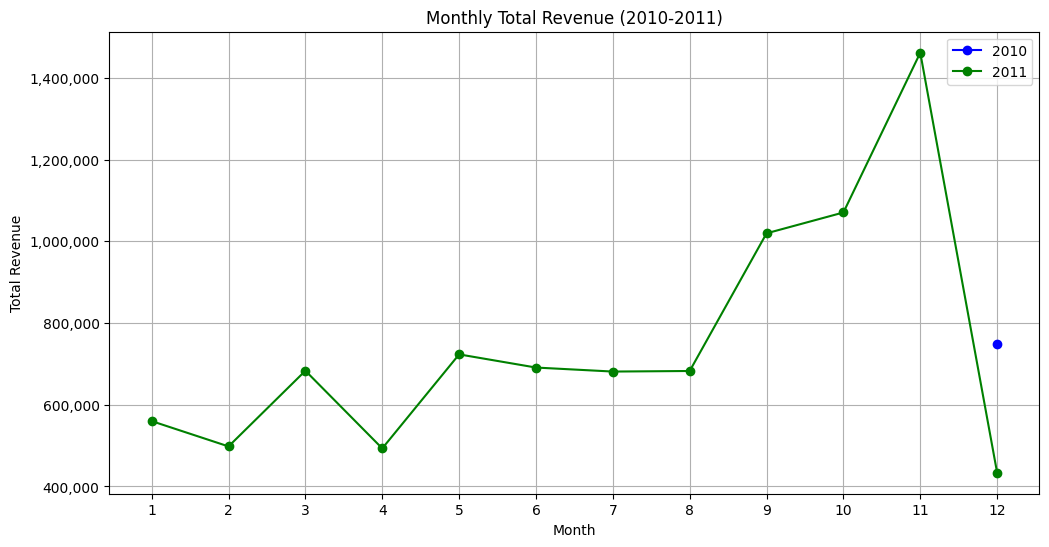

In [ ]:
def y_axis_formatter(x, pos):
    return f'{int(x):,}'  # Format the number with commas

df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month


monthly_revenue = df.groupby(['InvoiceYear', 'InvoiceMonth'])['TotalPrice'].sum().reset_index()

plt.figure(figsize=(12, 6))

# Filter data for 2010 and 2011
revenue_2010 = monthly_revenue[monthly_revenue['InvoiceYear'] == 2010]
revenue_2011 = monthly_revenue[monthly_revenue['InvoiceYear'] == 2011]

# Plot for 2010
plt.plot(revenue_2010['InvoiceMonth'], revenue_2010['TotalPrice'], marker='o', color='blue', label='2010', linestyle='-')

# Plot for 2011
plt.plot(revenue_2011['InvoiceMonth'], revenue_2011['TotalPrice'], marker='o', color='green', label='2011', linestyle='-')

plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Total Revenue (2010-2011)')
plt.xticks(range(1, 13))

plt.gca().yaxis.set_major_formatter(FuncFormatter(y_axis_formatter))

plt.legend()
plt.grid(True)
plt.show()


Insights from Monthly Total Revenue (2010-2011)
* 2010 (Blue Marker):
Only the revenue for December 2010 is visible, showing around 400,000. This indicates that revenue data for the earlier months of 2010 is either missing or not relevant to the current analysis.
* 2011 (Green Line):
  1. Steady Revenue in Early Months: In the first five months of 2011, the total revenue fluctuated around 600,000 to 700,000, with slight increases and decreases.
  2. June: There was a noticeable drop in revenue in June, where the revenue reached its lowest for the year at around 500,000.
  3. Significant Revenue Growth (September to November): From September, revenue started increasing significantly, culminating in the highest point in November at around 1,400,000, which indicates a strong sales performance during this period.
  4. December Drop: However, the revenue drastically declined in December 2011, going down to almost the same level as December 2010. This could indicate seasonal trends or issues such as returns, cancellations, or other operational factors during the holiday period.

In [ ]:
# Display rows where the 'quantity' column has negative values
negative_quantity = df[df['Quantity'] < 0]
print(negative_quantity)


       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
141    2010-12-01 09:41:00    

In [ ]:
negative_quantity = df[df['Quantity'] < 0]



negative_quantity['TotalRevenue'] = negative_quantity['Quantity'] * negative_quantity['UnitPrice']
total_revenue_negative_quantity = negative_quantity['TotalRevenue'].sum()
print(f"The total loss due to returned product: {total_revenue_negative_quantity}")



The total loss due to returned product: -896812.49


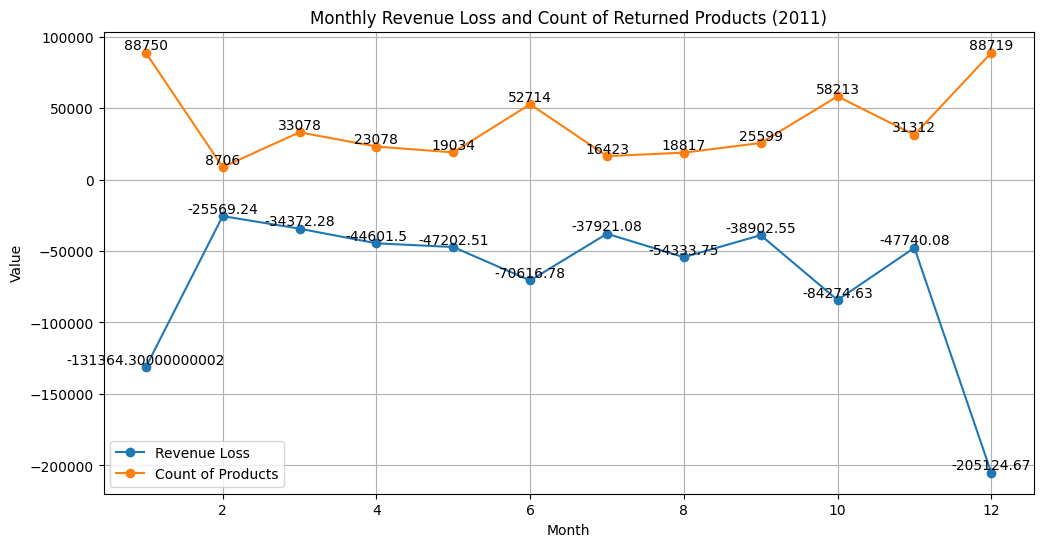

In [ ]:
negative_quantity_2011 = df[(df['InvoiceDate'].dt.year == 2011) & (df['Quantity'] < 0)]

# Calculate TotalRevenue for negative quantity
negative_quantity_2011['TotalRevenue'] = negative_quantity_2011['Quantity'] * negative_quantity_2011['UnitPrice']

# Group by month and calculate total revenue loss and count of products
monthly_data_2011 = negative_quantity_2011.groupby(negative_quantity_2011['InvoiceDate'].dt.month).agg({'TotalRevenue': 'sum', 'Quantity': 'sum'})


monthly_data_2011['Quantity'] = monthly_data_2011['Quantity'].abs()


plt.figure(figsize=(12, 6))
plt.plot(monthly_data_2011.index, monthly_data_2011['TotalRevenue'], marker='o', label='Revenue Loss')
plt.plot(monthly_data_2011.index, monthly_data_2011['Quantity'], marker='o', label='Count of Products')


# Add labels for Revenue Loss
for x, y in zip(monthly_data_2011.index, monthly_data_2011['TotalRevenue']):
  plt.text(x, y, str(y), ha='center', va='bottom')

# Add labels for Count of Products
for x, y in zip(monthly_data_2011.index, monthly_data_2011['Quantity']):
  plt.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Monthly Revenue Loss and Count of Returned Products (2011)')
plt.legend()
plt.grid(True)
plt.show()


**Insights from Monthly Revenue Loss and Count of Returned Products Chart**
* Revenue Loss (Blue Line):

  1. High Loss in January: The largest revenue loss occurred in January, with a loss of approximately 131,000, indicating high returns or other forms of revenue leakage.
  2. Stable Revenue Loss Throughout the Year: After January, the revenue loss stabilized, hovering between -25,000 to -70,000 in most months, showing a steady stream of returned products or refunds.
  3. Significant Spike in December: In December, the revenue loss sharply increased again to almost -280,000, making it the most significant loss month after January. This coincides with the drop in revenue seen in the first chart and highlights that returns or other issues in December likely contributed to the sharp drop in total revenue.
* Count of Returned Products (Orange Line):

  1. High Product Returns in January and December: The count of returned products was the highest in January (88,750) and December (108,807), correlating with the revenue losses in these months. This suggests a seasonal trend where returns are more frequent after major purchasing periods, such as holidays.
  2. Slight Fluctuations Throughout the Year: From February to November, the count of returned products remained relatively stable, fluctuating between 8,706 and 58,213, without any drastic spikes.
  3. Mid-Year Spike (June): There was a slight peak in June, where the number of returns increased to 52,714, potentially signaling a mid-year campaign or product issue that resulted in more returns.


  **Correlated Insights**:
1. Seasonal Effects (January and December): Both the January and December months show strong correlations between high returns and significant revenue losses, indicating that post-holiday returns might have a substantial impact on business performance. This is critical to manage, as it results in significant loss for the company during those months.

2. Mid-Year Stability: Although revenue losses and returned products remained fairly stable from March to November, there was a notable growth in total revenue from September to November, despite the steady count of returns. This suggests that sales outpaced returns during this period, leading to higher overall revenue despite the steady return rate.

**Recommendations:**
1. Manage Seasonal Returns:

  * Given the high volume of returns in January and December, it's essential to optimize return policies, provide clear product information, and ensure customer satisfaction during these months to minimize returns and revenue loss.
2. Promote and Sustain Growth in Q4: The significant increase in total revenue in September to November is a positive trend. The company should capitalize on this momentum by offering promotions, loyalty rewards, and maintaining product quality to boost sales while minimizing potential returns in December.

3. Return Prevention Strategies: Implement strategies to minimize returns throughout the year, such as improved customer education, robust product descriptions, and offering product trials or enhanced warranties to ensure customer confidence before purchasing.


In [ ]:
print(monthly_revenue)

    InvoiceYear  InvoiceMonth   TotalPrice
0          2010            12   748957.020
1          2011             1   560000.260
2          2011             2   498062.650
3          2011             3   683267.080
4          2011             4   493207.121
5          2011             5   723333.510
6          2011             6   691123.120
7          2011             7   681300.111
8          2011             8   682680.510
9          2011             9  1019687.622
10         2011            10  1070704.670
11         2011            11  1461756.250
12         2011            12   433668.010


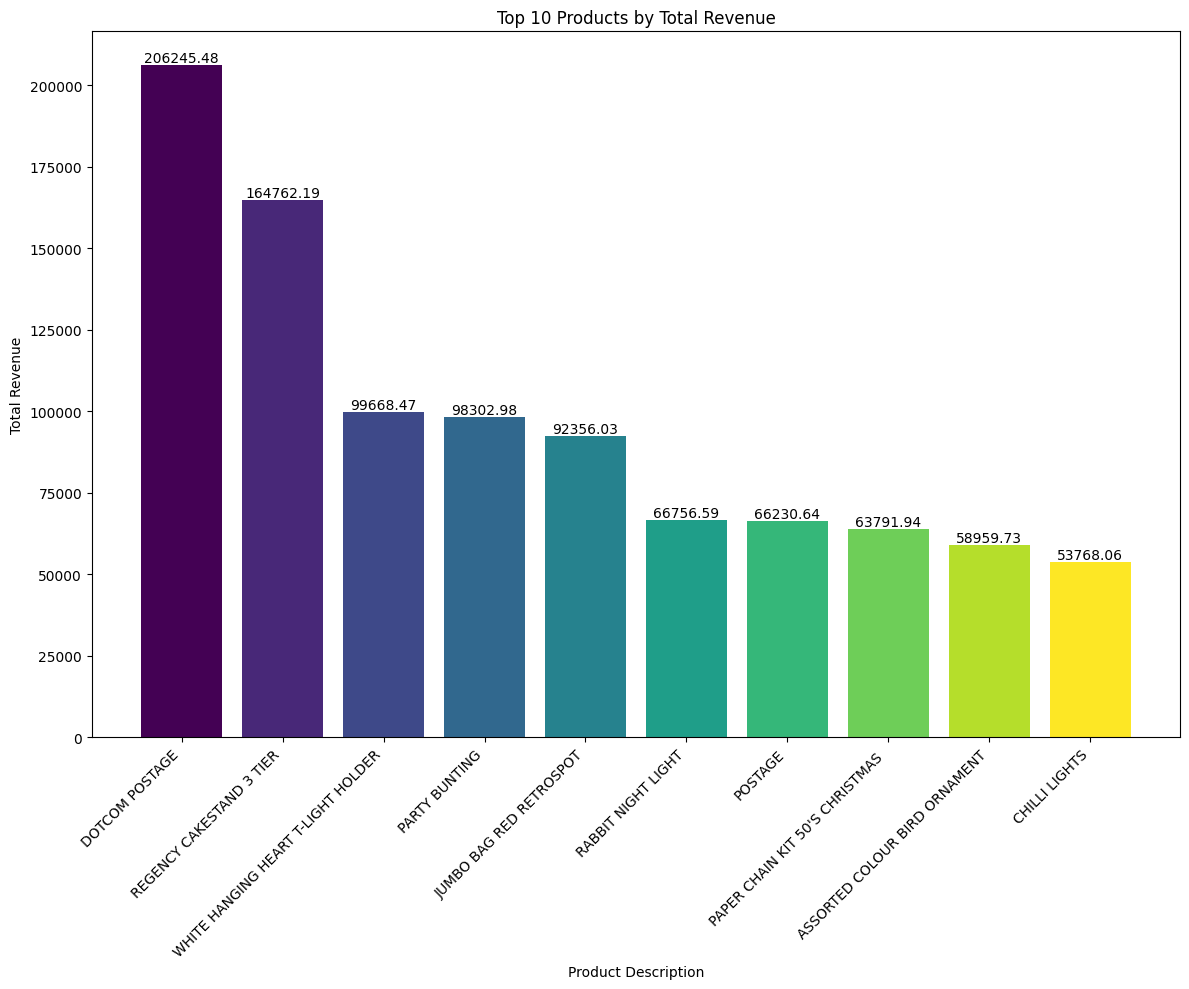

In [ ]:
# Group by Description and sum TotalPrice
top_revenue_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12, 10))
bar_colors = plt.cm.viridis(np.linspace(0, 1, len(top_revenue_products)))  # Create a color gradient
bars = plt.bar(top_revenue_products.index, top_revenue_products.values, color=bar_colors)

# Add labels to each bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Product Description')
plt.ylabel('Total Revenue')
plt.title('Top 10 Products by Total Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

                       TotalPrice  CustomerID
Country                                      
United Kingdom        8187806.364        3950
Netherlands            284661.540           9
EIRE                   263276.820           3
Germany                221698.210          95
France                 197403.900          87
Australia              137077.270           9
Switzerland             56385.350          21
Spain                   54774.580          31
Belgium                 40910.960          25
Sweden                  36595.910           8
Japan                   35340.620           8
Norway                  35163.460          10
Portugal                29367.020          19
Finland                 22326.740          12
Channel Islands         20086.290           9
Denmark                 18768.140           9
Italy                   16890.510          15
Cyprus                  12946.290           8
Austria                 10154.320          11
Hong Kong               10117.040 

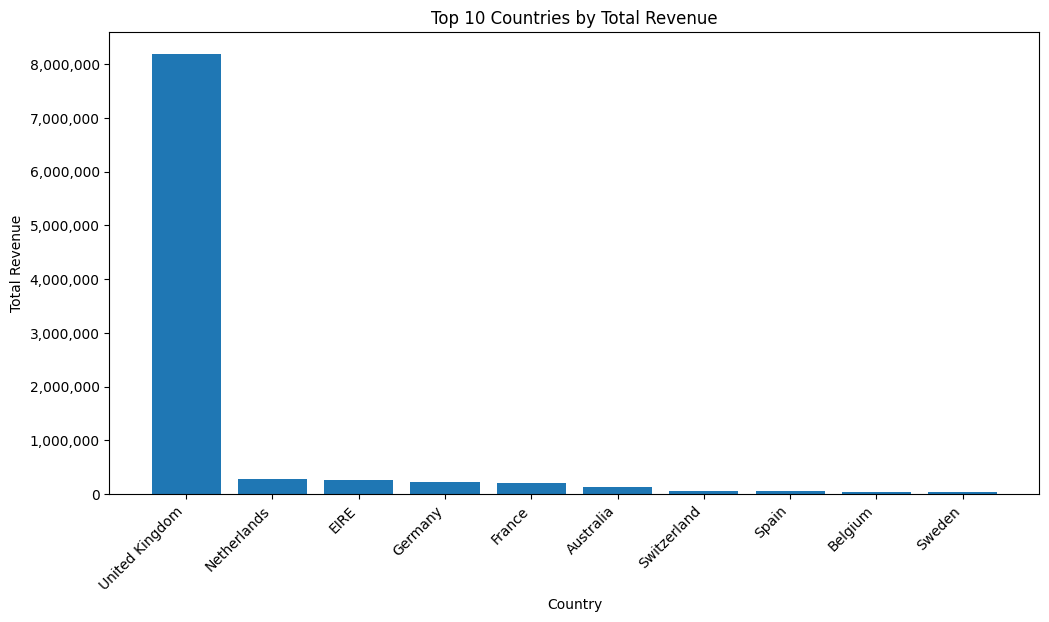

In [ ]:
# Group by Country and calculate total revenue and customer count
country_analysis = df.groupby('Country').agg({'TotalPrice': 'sum', 'CustomerID': 'nunique'}).sort_values('TotalPrice', ascending=False)

print(country_analysis)


top_10_countries = country_analysis['TotalPrice'].head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Top 10 Countries by Total Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability


current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

**Insight From Total Revenue by Country**

Based on the chart above, it can be seen that sales are still focused locally (UK). It would be beneficial to increase international sales, which can be achieved by creating an online store, thereby increasing total revenue.

<Figure size 1200x600 with 0 Axes>

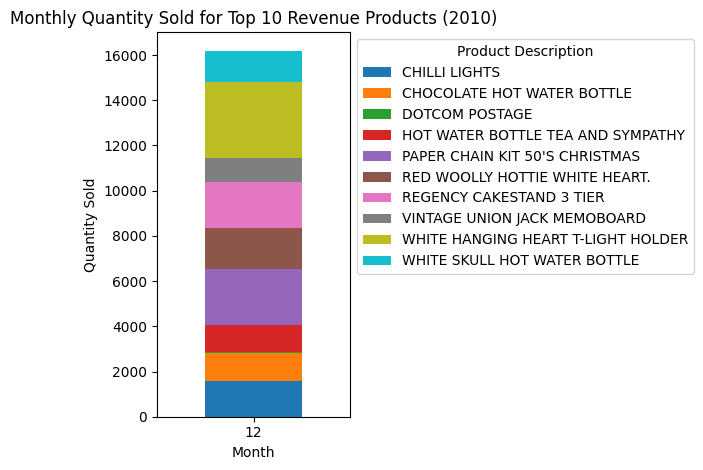

In [ ]:
# Group by Description and sum TotalPrice to find top revenue products
top_revenue_products = df[df['InvoiceYear'] == 2010].groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10).index.tolist()

# Filter the DataFrame to include only the top revenue products
df_top_products = df[df['InvoiceYear'] == 2010][df['Description'].isin(top_revenue_products)]

# Group by month and Description, then sum Quantity
monthly_product_quantity = df_top_products.groupby(['InvoiceMonth', 'Description'])['Quantity'].sum().unstack()

plt.figure(figsize=(12, 6))
monthly_product_quantity.plot(kind='bar', stacked=True)

plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.title('Monthly Quantity Sold for Top 10 Revenue Products (2010)')
plt.xticks(rotation=0)
plt.legend(title='Product Description', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


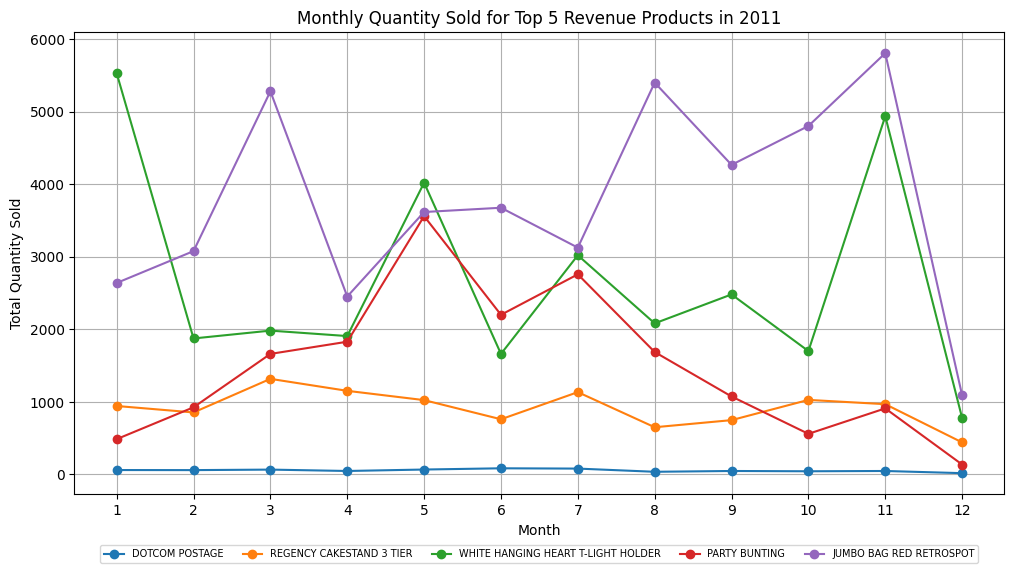

In [ ]:
df_2011 = df[df['InvoiceYear'] == 2011]
top_5_products = df.groupby('Description')['TotalPrice'].sum().nlargest(5).index

# Filter the data for the top 5 products in 2011
df_top_5_2011 = df_2011[df_2011['Description'].isin(top_5_products)]
monthly_quantity_top_5 = df_top_5_2011.groupby(['InvoiceMonth', 'Description'])['Quantity'].sum().reset_index()

plt.figure(figsize=(12, 6))

for product in top_5_products:
  product_data = monthly_quantity_top_5[monthly_quantity_top_5['Description'] == product]
  plt.plot(product_data['InvoiceMonth'], product_data['Quantity'], marker='o', label=product)

plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.title('Monthly Quantity Sold for Top 5 Revenue Products in 2011')
plt.xticks(range(1, 13))
plt.legend(loc='upper center', fontsize=7, bbox_to_anchor=(0.5, -0.1), ncol=5)
plt.grid(True)
plt.show()


**Insight**

1. Strong Seasonal Trends (November Spike):

  * The product "RABBIT NIGHT LIGHT" shows a huge spike in sales during November (Month 11), reaching over 14,000 units, but drops sharply in December. This suggests a strong seasonal demand, possibly due to holiday shopping or a promotional event.
  * "PAPER CHAIN KIT 50'S CHRISTMAS" also spikes in November but at a lower quantity, indicating it may be related to holiday or Christmas-specific sales.
2. Steady Performers:

  * Products like "DOTCOM POSTAGE" and "REGENCY CAKESTAND 3 TIER" maintain a relatively steady sales volume throughout the year, with no major fluctuations. This suggests that these products have consistent demand, making them reliable revenue generators.
3. Moderate Increases Around September/October:

  * Several products like "JUMBO BAG RED RETROSPOT" and "ASSORTED COLOUR BIRD ORNAMENT" experience an uptick in sales around September and October (Months 9 and 10), which could be due to seasonal demand as people prepare for events or holidays later in the year.
4. Low Volume Products:

  * "WHITE HANGING HEART T-LIGHT HOLDER" and "CHILLI LIGHTS" have relatively low sales volume throughout the year, staying under 2,000 units per month, indicating these are lower-demand products compared to the top-selling items.
5. Potential Promotions or Events in Specific Months:

  * The sharp increases for products like "RABBIT NIGHT LIGHT" in November and "JUMBO BAG RED RETROSPOT" in August could suggest promotional activities or special events that temporarily boosted sales.

  **Recommendation**

  1. Consistently sold products such as "DOTCOM POSTAGE" and "REGENCY CAKESTAND 3 TIER" are key for maintaining steady revenue.
  2. Retailers should focus on capitalizing on high-demand products in November while managing inventory for low-demand products year-round.

# Customer Segmentation using KMeans

In [ ]:
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum()

# Calculate average order value per customer
customer_avg_order_value = df.groupby('CustomerID')['TotalPrice'].mean()

# Calculate total number of orders per customer
customer_order_count = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Create a new DataFrame with customer segmentation data
customer_segmentation = pd.DataFrame({
    'TotalSpending': customer_spending,
    'AverageOrderValue': customer_avg_order_value,
    'OrderCount': customer_order_count
})

In [ ]:
from sklearn.cluster import KMeans

features = ['TotalSpending', 'AverageOrderValue', 'OrderCount']
X = customer_segmentation[features]

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

customer_segmentation['Cluster'] = kmeans.labels_

cluster_analysis = customer_segmentation.groupby('Cluster').agg({
    'TotalSpending': 'mean',
    'AverageOrderValue': 'mean',
    'OrderCount': 'mean'
})

print(cluster_analysis)

         TotalSpending  AverageOrderValue  OrderCount
Cluster                                              
0          1434.198064          27.935681    4.720433
1        241136.560000         420.140475   64.666667
2         58418.754348         148.490239   64.391304


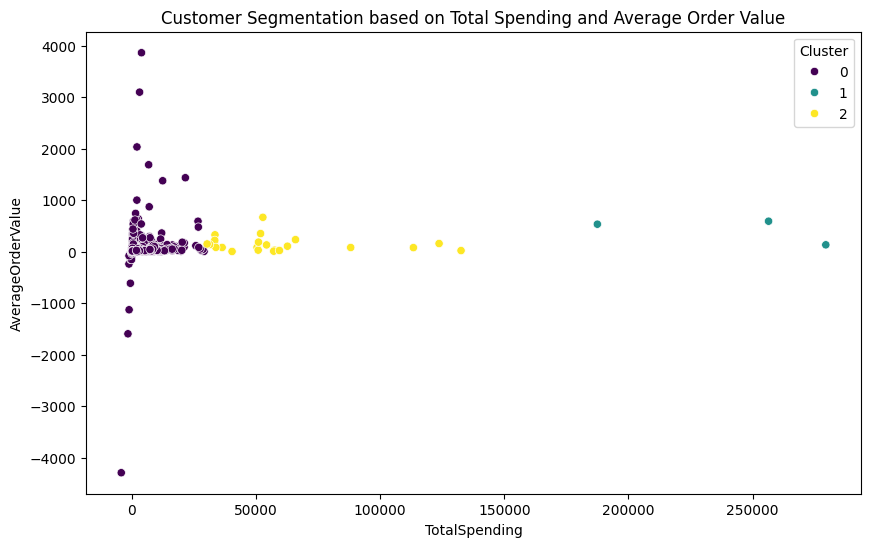

Top 5 products for Cluster 0:
      Cluster                         Description  Quantity
3763        0   WORLD WAR 2 GLIDERS ASSTD DESIGNS     50040
1752        0             JUMBO BAG RED RETROSPOT     27448
215         0       ASSORTED COLOUR BIRD ORNAMENT     27446
3675        0  WHITE HANGING HEART T-LIGHT HOLDER     24536
2219        0          PACK OF 12 LONDON TISSUES      24380
Top 5 products for Cluster 1:
      Cluster                         Description  Quantity
4029        1             CREAM HEART CARD HOLDER      5946
4185        1               HEART OF WICKER SMALL      5661
4454        1                  RABBIT NIGHT LIGHT      4801
4723        1  WHITE HANGING HEART T-LIGHT HOLDER      4530
4184        1               HEART OF WICKER LARGE      4512
Top 5 products for Cluster 2:
      Cluster              Description  Quantity
6069        2  JUMBO BAG RED RETROSPOT     15518
6665        2           POPCORN HOLDER     15236
5151        2      BROCADE RING PURSE      

In [ ]:
#Scatter plot of TotalSpending vs. AverageOrderValue, colored by cluster)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSpending', y='AverageOrderValue', hue='Cluster', data=customer_segmentation,palette='viridis')

plt.title('Customer Segmentation based on Total Spending and Average Order Value')
plt.show()

customer_product_purchases = df.groupby(['CustomerID', 'Description'])['Quantity'].sum().reset_index()

customer_product_purchases = pd.merge(customer_product_purchases, customer_segmentation, on='CustomerID')

#Find the most popular products for each cluster)
cluster_product_analysis = customer_product_purchases.groupby(['Cluster', 'Description'])['Quantity'].sum().reset_index()

for cluster in cluster_product_analysis['Cluster'].unique():
  cluster_products = cluster_product_analysis[cluster_product_analysis['Cluster'] == cluster].sort_values('Quantity', ascending=False).head(5)
  print(f"Top 5 products for Cluster {cluster}:")
  print(cluster_products)

## Cluster Analysis
1. Cluster 0: Low-Spending Customers (Purple)
- Insight:
These customers are not big spenders, but they do place frequent orders. They may be price-sensitive or only purchasing low-cost items.
Their total spending is quite low, which means they contribute less to the business's overall revenue.
- Recommendation:
  * Upsell and Cross-Sell: You can increase their average order value by
recommending complementary products or higher-end alternatives during checkout.
  * Targeted Discounts: Provide incentives like small discounts or free shipping for higher-order thresholds to encourage larger purchases.
  * Loyalty Programs: Create a loyalty program that rewards frequent purchases, motivating them to spend more to get additional benefits.
2. Cluster 1: High-Spending, High-Frequency Customers (Teal)
- Insight:
These are your top customers. They purchase frequently and spend a lot. They likely have a strong connection with your brand and are driving a significant part of your revenue.
- Recommendation:
  * VIP Treatment: Reward them with special perks, such as early access to products, exclusive offers, or personalized discounts. This will help retain them and encourage them to continue their high level of engagement.
  * Premium Products: Offer them premium, high-end products or services, as they have shown a willingness to spend.
  * Retention: Focus on retention strategies, like personalized communications, thank-you notes, or occasional check-ins, to maintain the relationship and make them feel valued.
3. Cluster 2: Mid-Tier Customers (Yellow)
- Insight:
This group spends a decent amount but isn’t quite at the high level of Cluster 1. They are frequent shoppers, but their average order value is lower.
They have the potential to move up to Cluster 1 if nurtured properly.
- Recommendation:
  * Personalized Offers: Send personalized recommendations or product bundles to encourage higher spending. Highlight related products or packages that might appeal to their preferences.
  * Upsell to Premium: They are already engaged with your brand, so use product recommendations or promotions that entice them to try higher-value items.
  * Engage More Deeply: Send loyalty points or bonus offers based on their purchase history to encourage even more frequent and larger orders.

# RFM Analysis

In [ ]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)  # Assuming analysis date is the day after the last transaction
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency: Count of unique invoices
    'TotalPrice': 'sum'                                       # Monetary: Total spent
}).reset_index()

# Rename columns to Recency, Frequency, and Monetary
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# RFM score calculation
# Rank customers by Recency (the lower the better), Frequency (the higher the better), and Monetary (the higher the better)
rfm['R_rank'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_rank'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_rank'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Combine RFM score
rfm['RFM_Score'] = rfm['R_rank'].astype(str) + rfm['F_rank'].astype(str) + rfm['M_rank'].astype(str)

#create RFM segments
rfm['RFM_Segment'] = rfm.apply(lambda row: f"{row['R_rank']}{row['F_rank']}{row['M_rank']}", axis=1)

# Sort customers by the highest RFM score
rfm = rfm.sort_values('RFM_Score', ascending=False)

print(rfm.head())

      CustomerID  Recency  Frequency  Monetary R_rank F_rank M_rank RFM_Score  \
3249     16746.0        5         19   6694.31      5      5      5       555   
652      13199.0        4         39   9803.96      5      5      5       555   
3560     17173.0        5          9   3755.65      5      5      5       555   
794      13394.0        2         10   2312.80      5      5      5       555   
803      13408.0        2         81  27487.41      5      5      5       555   

     RFM_Segment  
3249         555  
652          555  
3560         555  
794          555  
803          555  


In [ ]:
print(rfm)

      CustomerID  Recency  Frequency  Monetary R_rank F_rank M_rank RFM_Score  \
3249     16746.0        5         19   6694.31      5      5      5       555   
652      13199.0        4         39   9803.96      5      5      5       555   
3560     17173.0        5          9   3755.65      5      5      5       555   
794      13394.0        2         10   2312.80      5      5      5       555   
803      13408.0        2         81  27487.41      5      5      5       555   
...          ...      ...        ...       ...    ...    ...    ...       ...   
125      12503.0      338          1  -1126.00      1      1      1       111   
600      13132.0      262          1     77.30      1      1      1       111   
227      12622.0      232          1    180.10      1      1      1       111   
183      12574.0      316          1    218.45      1      1      1       111   
1275     14059.0      267          1    183.60      1      1      1       111   

     RFM_Segment  
3249    

In [ ]:

unique_rfm_scores = rfm['RFM_Score'].unique()

print(unique_rfm_scores)


['555' '554' '553' '552' '545' '544' '543' '542' '541' '535' '534' '533'
 '532' '531' '525' '524' '523' '522' '521' '515' '513' '512' '511' '455'
 '454' '453' '451' '445' '444' '443' '442' '441' '435' '434' '433' '432'
 '431' '425' '424' '423' '422' '421' '414' '413' '412' '411' '355' '354'
 '353' '345' '344' '343' '342' '341' '335' '334' '333' '332' '331' '325'
 '324' '323' '322' '321' '315' '314' '313' '312' '311' '255' '254' '253'
 '252' '251' '245' '244' '243' '242' '241' '235' '234' '233' '232' '231'
 '225' '224' '223' '222' '221' '215' '214' '213' '212' '211' '155' '154'
 '153' '152' '145' '144' '143' '142' '141' '135' '134' '133' '132' '131'
 '125' '124' '123' '122' '121' '115' '114' '113' '112' '111']


In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4372 entries, 3249 to 1275
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CustomerID   4372 non-null   float64 
 1   Recency      4372 non-null   int64   
 2   Frequency    4372 non-null   int64   
 3   Monetary     4372 non-null   float64 
 4   R_rank       4372 non-null   category
 5   F_rank       4372 non-null   category
 6   M_rank       4372 non-null   category
 7   RFM_Score    4372 non-null   object  
 8   RFM_Segment  4372 non-null   object  
dtypes: category(3), float64(2), int64(2), object(2)
memory usage: 252.5+ KB


In [ ]:
rfm['R_rank'] = rfm['R_rank'].astype(int)
rfm['F_rank'] = rfm['F_rank'].astype(int)
rfm['M_rank'] = rfm['M_rank'].astype(int)


In [ ]:
def rfm_segment(df):
    # VIP Customers: Top buyers, frequent shoppers, or big spenders
    if (df['R_rank'] == 5 and df['F_rank'] >= 4 and df['M_rank'] >= 4) or (df['M_rank'] >= 4 and df['F_rank'] >= 4):
        return 'VIP Customers'
    # Promising Customers: Frequent and recent shoppers with growing potential
    elif (df['R_rank'] >= 4 and df['F_rank'] >= 3 and df['M_rank'] >= 3):
        return 'Promising Customers'
    # New and Growing Customers: Recent first-time buyers or growing engagement
    elif (df['R_rank'] == 5 and df['F_rank'] == 1 and df['M_rank'] in [1, 2, 3]) or (df['R_rank'] == 5 and df['F_rank'] >= 1):
        return 'New and Growing Customers'
    # At Risk Customers: Once valuable but now buying less often
    elif (df['R_rank'] in [2, 3] and df['F_rank'] in [2, 3] and df['M_rank'] >= 3) or (df['R_rank'] <= 2 and df['M_rank'] >= 4):
        return 'At Risk Customers'
    # Inactive Customers: Haven’t purchased in a while, spending was low or moderate
    elif (df['R_rank'] <= 2 and df['F_rank'] <= 2 and df['M_rank'] <= 3):
        return 'Inactive Customers'
    else:
        return 'Low Activity'


rfm['Segment'] = rfm.apply(rfm_segment, axis=1)


print(rfm['Segment'].value_counts())


Segment
VIP Customers                1396
Low Activity                 1053
Inactive Customers            923
At Risk Customers             489
Promising Customers           337
New and Growing Customers     174
Name: count, dtype: int64


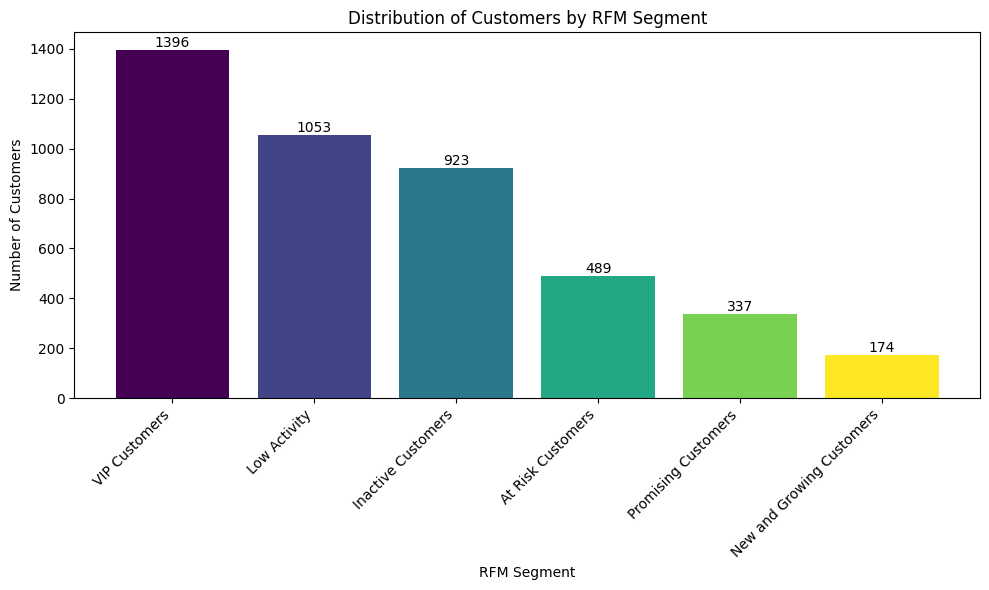

In [ ]:
segment_counts = rfm['Segment'].value_counts()

bar_colors = plt.cm.viridis(np.linspace(0, 1, len(segment_counts)))

plt.figure(figsize=(10, 6))
bars = plt.bar(segment_counts.index, segment_counts.values, color=bar_colors)

# Add labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by RFM Segment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##Recommendation

How to Deal with Each Segment:
1. VIP Customers (Top buyers, loyal, and high spenders):
- Objective: Retain and delight.
- Action: Offer exclusive perks, early access to products, special discounts, or loyalty rewards. Make them feel valued through personalized offers and communications.
2. Promising Customers (Potential loyalists, frequent buyers, moderate spenders):

- Objective: Nurture and encourage more spending.
- Action: Provide targeted incentives to increase frequency and spending, such as upselling, personalized recommendations, and special promotions. Highlight loyalty program benefits to keep them coming back.
3. New and Growing Customers (First-time buyers, recent customers):

- Objective: Convert into loyal customers.
- Action: Focus on onboarding and building a relationship through post-purchase follow-ups, special "welcome" offers, and tips or content that enhances their experience. Educate them about your products and services.
4. At Risk Customers (Once valuable, declining frequency):

- Objective: Win back their business.
- Action: Use re-engagement campaigns with personalized messaging, special offers, or a reminder about the value they’ve previously enjoyed. Offer incentives or even exclusive win-back promotions.
5. Inactive Customers (Low spending, low activity):

- Objective: Reactivate or manage profitably.
- Action: Send targeted win-back campaigns or surveys to understand why they became inactive. If reactivation fails, focus on offering low-cost, low-effort options (like clearance sales or basic email newsletters).